# Time Series analysis on Walmart dataset

**Libraries**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima
import numpy as np
from sklearn.metrics import mean_squared_error 

**Uploading the data**

In [2]:
wal_df = pd.read_csv('Walmart.csv')

In [4]:
wal_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
wal_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# no null 

In [7]:
wal_df.duplicated().sum()

0

In [8]:
# no duplicates

In [9]:
# taking only the required columns and creating a new df

In [10]:
tdf = wal_df[['Date','Weekly_Sales']]

In [11]:
tdf

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68
...,...,...
6430,28-09-2012,713173.95
6431,05-10-2012,733455.07
6432,12-10-2012,734464.36
6433,19-10-2012,718125.53


In [12]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [13]:
timed = tdf.copy()

In [14]:
timed

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68
...,...,...
6430,28-09-2012,713173.95
6431,05-10-2012,733455.07
6432,12-10-2012,734464.36
6433,19-10-2012,718125.53


In [16]:
timed['Date'] = pd.to_datetime(timed['Date'],format='mixed')

In [18]:
timed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 100.7 KB


In [19]:
timed=timed.set_index("Date")

In [20]:
timed

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


In [21]:
timed = timed['Weekly_Sales'].resample('M').mean()

In [22]:
timed

Date
2010-01-31    9.386639e+05
2010-02-28    1.064372e+06
2010-03-31    1.034590e+06
2010-04-30    1.021177e+06
2010-05-31    1.039303e+06
2010-06-30    1.055082e+06
2010-07-31    1.023702e+06
2010-08-31    1.025212e+06
2010-09-30    9.983559e+05
2010-10-31    1.027201e+06
2010-11-30    1.176097e+06
2010-12-31    1.198413e+06
2011-01-31    9.420697e+05
2011-02-28    1.042273e+06
2011-03-31    1.011263e+06
2011-04-30    1.033220e+06
2011-05-31    1.015565e+06
2011-06-30    1.038471e+06
2011-07-31    9.976049e+05
2011-08-31    1.044895e+06
2011-09-30    1.026810e+06
2011-10-31    1.020663e+06
2011-11-30    1.126535e+06
2011-12-31    1.274311e+06
2012-01-31    9.567817e+05
2012-02-29    1.057997e+06
2012-03-31    1.025510e+06
2012-04-30    1.014127e+06
2012-05-31    1.053948e+06
2012-06-30    1.082920e+06
2012-07-31    1.025480e+06
2012-08-31    1.064514e+06
2012-09-30    9.988663e+05
2012-10-31    1.044885e+06
2012-11-30    1.042797e+06
2012-12-31    1.025078e+06
Freq: M, Name: Weekly_S

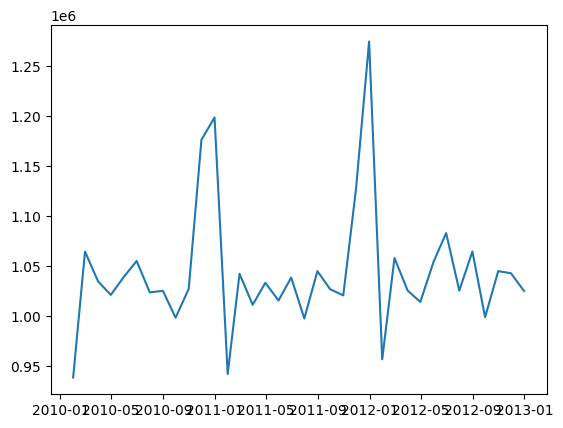

In [23]:
plt.plot(timed)

In [24]:
decomposition=seasonal_decompose(timed,period=12)
decomposition

In [25]:
trend=decomposition.trend
sesonal=decomposition.seasonal
residual=decomposition.resid

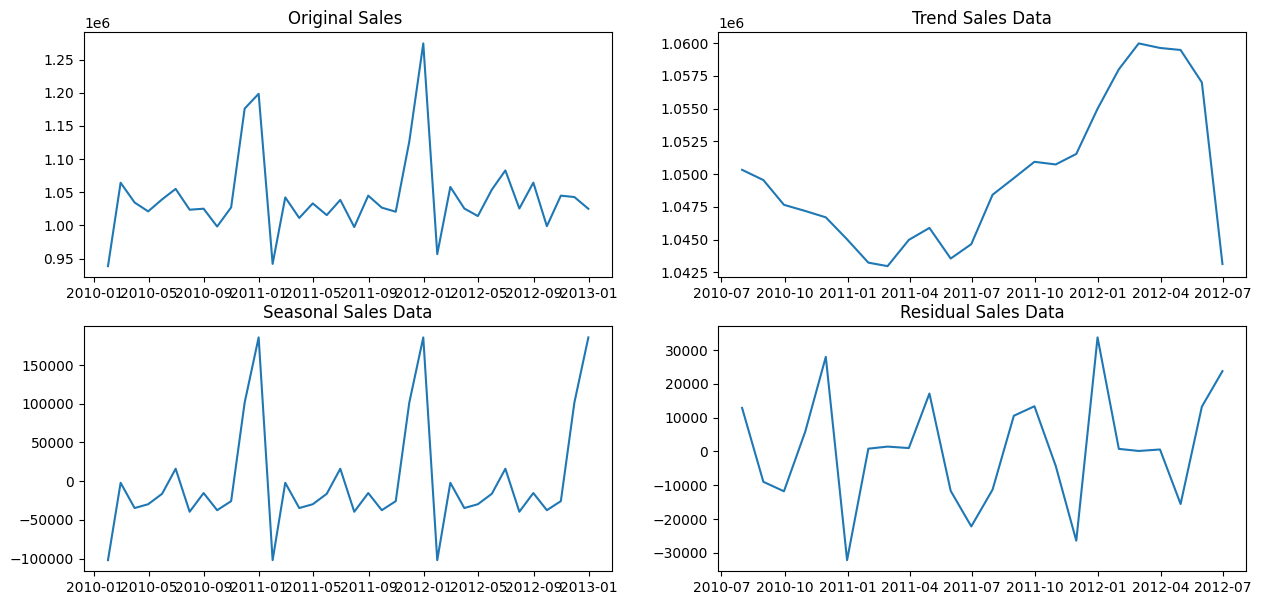

In [26]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.ravel()
ax[0].plot(timed)
ax[0].set_title('Original Sales ')
ax[1].plot(trend,data=timed)
ax[1].set_title('Trend Sales Data')
ax[2].plot(sesonal,data=timed)
ax[2].set_title('Seasonal Sales Data')
ax[3].plot(residual,data=timed)
ax[3].set_title('Residual Sales Data')

plt.show()

In [27]:
# Stationary Testing
result = adfuller(timed)
p_value1 = result[1]

In [28]:
p_value1

1.212439895949573e-07

In [29]:
# data is stationary

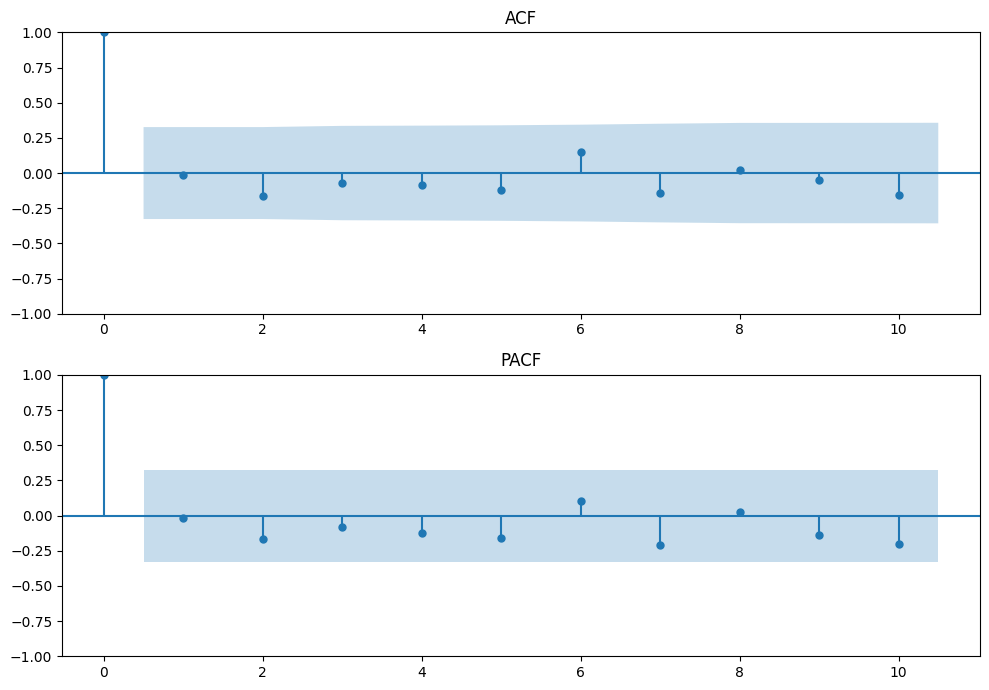

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))

#ACF_PLOT
plot_acf(timed, lags = 10, ax=ax[0])
ax[0].set_title('ACF')

#PACF_PLOT
plot_pacf(timed, lags=10,ax=ax[1])
ax[1].set_title('PACF')

plt.tight_layout()

In [32]:
split_data = int(0.7*len(timed))
train_data=timed.iloc[:split_data]
test_data =timed.iloc[split_data:]

In [33]:
len(train_data)

25

In [34]:
len(test_data)

11

In [35]:
# model arima
#(000)(000)   white noise

In [44]:
def walk_fwd_validation(timed,train_size,p_values,d_values,q_values):
    train=timed[:train_size]
    test=timed[train_size:]
    
    best_score=float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                
                past_data=[x for x in train]
                for i in range(len(test)):
                    model=sm.tsa.ARIMA(past_data,order=(p,d,q))
                    model=model.fit()
                    pred=model.predict(start=train_size,end=len(timed)-1)
                    rmse=mean_squared_error(test,pred)
                    
                    if rmse<best_score:
                        best_score=rmse
                        optimal_value=(p,d,q)
    return optimal_value             

In [45]:
p_values=np.arange(0,6)
q_values=np.arange(0,5)
d_values=np.arange(0,3)
train_size=int(len(timed)*0.8)
best_params=walk_fwd_validation(timed,train_size,p_values,d_values,q_values)

In [46]:
best_params

(5, 0, 1)

In [66]:
ar_ml2=sm.tsa.ARIMA(train_data,order=(5,0,1)).fit()
pred1=ar_ml2.predict(0,len(test_data)-1)

In [67]:
pred1

Date
2010-01-31    1.045305e+06
2010-02-28    1.037697e+06
2010-03-31    1.088040e+06
2010-04-30    1.040336e+06
2010-05-31    1.062329e+06
2010-06-30    1.073505e+06
2010-07-31    1.031420e+06
2010-08-31    1.060466e+06
2010-09-30    1.041188e+06
2010-10-31    1.060250e+06
2010-11-30    1.055844e+06
Freq: M, Name: predicted_mean, dtype: float64

In [68]:
lb_p_val = acorr_ljungbox(ar_ml2.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,15.559198,0.743567


In [69]:
# pval>0.05, good model

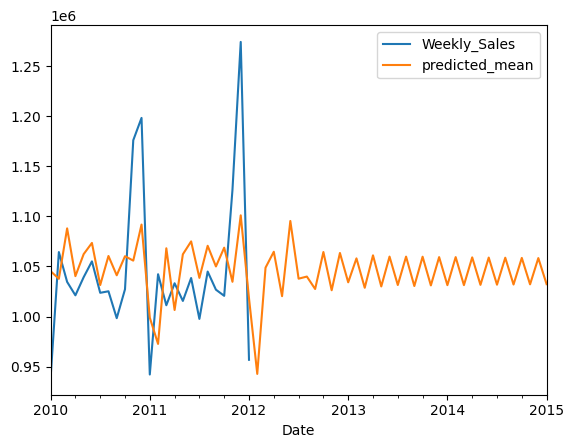

In [70]:
train_data.plot()
ar_ml2.predict(start = 0, end = 60).plot()
plt.legend()

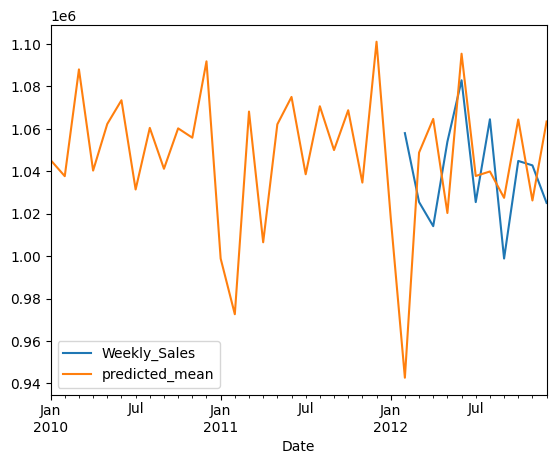

In [80]:
test_data.plot()
ar_ml2.predict(start =0, end = len(timed)-1).plot()
plt.legend()

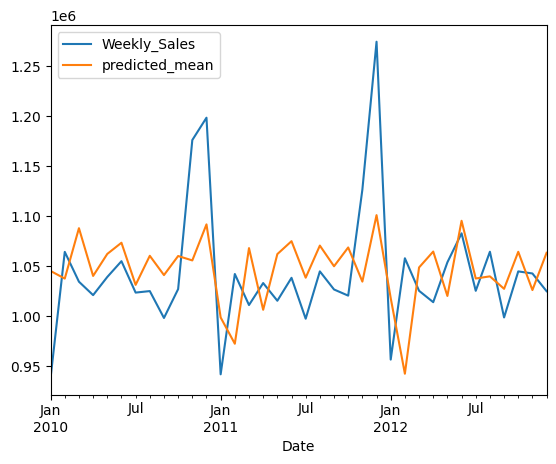

In [72]:
timed.plot()
ar_ml2.predict(start =0, end = len(timed)-1).plot()
plt.legend()

In [53]:
# SARIMA Model

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
order = (5,1,1)
seasonal_order =(5,1,5,12)
ml1 = SARIMAX(train_data, order = order, seasonal_order=seasonal_order)#seasonorder = p,d,q,m
mdl_s =ml1.fit()

In [75]:
pred_sa = mdl_s.predict(start = timed.index[0], end = timed.index[-1])

In [76]:
# pred_sa

In [77]:
lb_p_val1 = acorr_ljungbox(mdl_s.resid, lags = [20], return_df = True)
lb_p_val1

,lb_stat,lb_pvalue
20,14.056525,0.827618


In [78]:
#pval > 0.05, good model

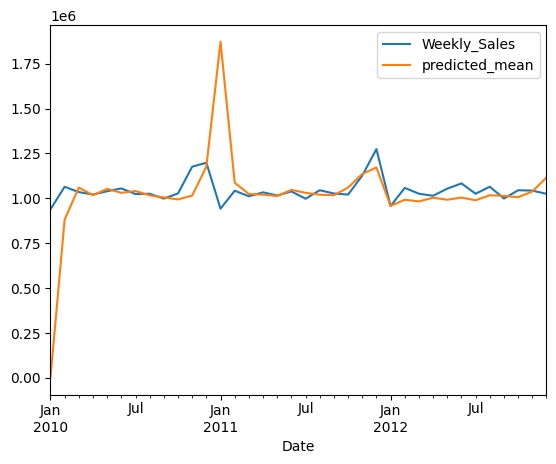

In [64]:
timed.plot()
mdl_s.predict(start =0, end = len(timed)-1).plot()
plt.legend()

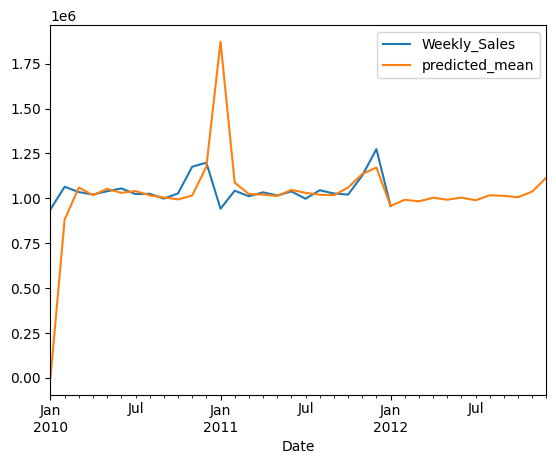

In [81]:
train_data.plot()
mdl_s.predict(start =0, end = len(timed)-1).plot()
plt.legend()

In [83]:
# the model perdicting an increase in the weekly sales 